# TitanicByPy Project
## Machine Learning Shipwreck Analisys 

This document aims to describe the entire analysis, where we will, at first, understand the problem. Next, we will explore the data and build two Machine Learning models (Logistic Regression and Decision Tree) to generate predictions.

Briefly, the goal of this challenge is to use the available data to measure an important opportunity for passengers on the Titanic.


## Checklist

It is convenient that we follow a framework, a flowchart or at least a checklist with some essential steps for a good analysis, like every Data Science project. For this project, we will follow the steps below:

1. Problem Definition

2. Obtaining the Data

3. Data Exploration

4. Data Preparation

5. Modeling

6. Assessment

### 1. Problem Definition

The construction of the Titanic took about 2 years and cost 7.5 million dollars. At 269 meters long, 28 meters wide and 53 meters high, it operated with a crew of 892 people and could carry up to 2435 passengers (spread across the three available classes).

Thought to be the safest and most luxurious ship at the time, it was launched in 1911, gaining a reputation for being "unsinkable".

The sinking of the Titanic had as contributing factors natural causes (such as the climate) and human causes (neglect and overconfidence). Regardless of the causes, the fact is that its shipwreck killed 1502 people out of a total of 2224 passengers.

Although those who escaped with their lives had their fair share of luck, some groups of people were more likely to escape death than others. For example, women, children and 1st class passengers. Thus, it is noted that there is some pattern that can be extracted from the raw data.

#### Objective
Hopefully, we want to be able to do an **analysis of which variables had the greatest influence on the probability of survival** (ie, which type of person was most likely to escape with their lives).

After analyzing the data, we are also expected to be able to **build a model that gives the survival** prediction for any passenger provided as input.

#### Performance Metrics
The score is calculated on the number of correct predictions our model has made. In other words, only the accuracy of the model is considered.

### 2. Obtaining the data
* Training Dataset (train.csv)

Must be used to build the Machine Learning model. In this dataset, it is informed whether the passenger survived or not.
Composed of several features such as passenger gender and boarding class.

* Test Dataset (test.csv)

It should be used as data that is never seen by the model. In this dataset, it is not informed whether the passenger survived or not.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permission to visualize all the columns
pd.options.display.max_columns = None

# rndering graph directly on notebook
# matplotlib inline

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

**1st Question**: How many variables (columns) and how many entries (rows) does the file have?

In [5]:

#checking dataframe dimension
print("Variables:\t{}\nEntrances:\t{}".format(train.shape[1], train.shape[0]))

Variables:	12
Entrances:	891


### 3. Exploring data

#### Data Dictionary 

* PassengerId: Passenger identification number

* Survived: Informs whether the passenger survived the disaster

    * 0 = No

    *  1 = Yes

* Pclass: Ticket Class:

    * 1 = 1st Class

    * 2 = 2nd Class

    * 3 = 3rd Class

* Name: Passenger Name

* Sex: Gender of the passenger

* Age: Age of passenger

* SibSp: Number of spouses and siblings on board

* Parch: Number of parents and children on board

* Ticket: Ticket number

* Fare: Ticket Price

* Cabin: Passenger cabin number

* Embarked: Port at which the passenger boarded:

    * C = Cherbourg

    * Q = Queenstown

    * S = Southampton

#### **What types of each variable?**

* Numerical Variables
    * Discreet
        * Pclass
        * SibSp
        * Parch
    * continuous
        * act
        * fare
    * Target
        * Survived
    * Primary Key
        * PassengerId
* Categorical Variables
    * Name
    * Fri
    * Ticket
    * Cabin
    * Embarked


In [7]:
#identifying each type of variable
display(train.dtypes)

#see the first 5 entries of the dataset
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **What percentage of missing values?**

Cabin information has the most missing information, with more than 77%. Afterwards, the Age column has no value in almost 20% of passengers. Finally, the column informing the Port of Embarkation (Embarked) has only 2% of missing information.

In [8]:
# see the percentage missing values
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

#### **How is the statistical distribution of data?**


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


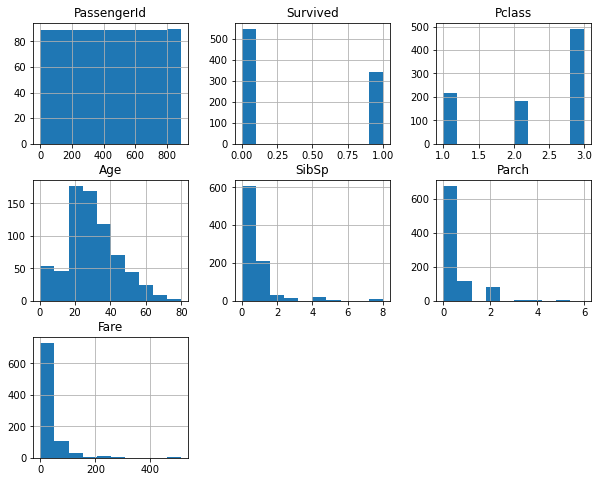

In [10]:
#numerical variables histogram
train.hist(figsize=(10,8));

#### **Which groups of people were most likely to survive?**

In [12]:
# Analyze survival probability by sex
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

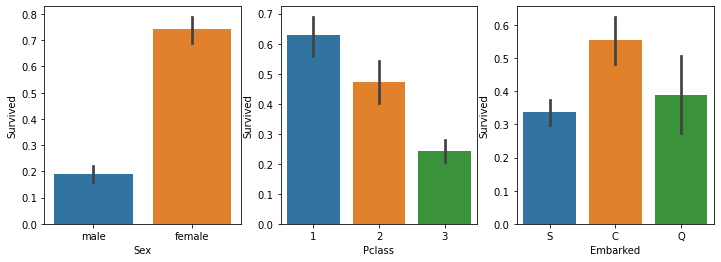

In [11]:
#ploting the graphs to indicate Survived vs. Sex, Pclass and Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize =(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)

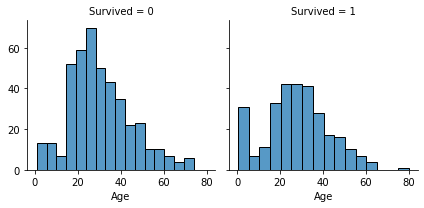

In [39]:
#influence of age on the probability of survival
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.histplot, 'Age')

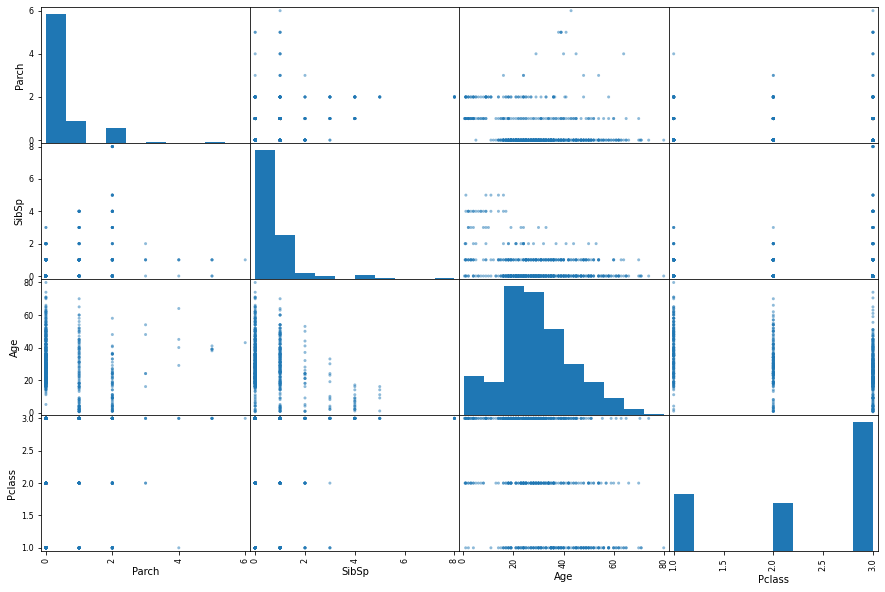

In [40]:
#ploting a scatter matrix
columns = ['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

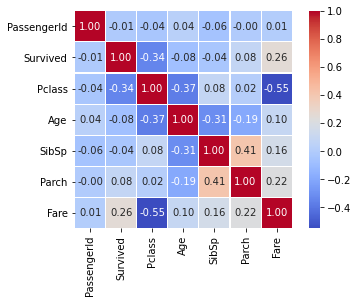

In [41]:
#ploting the heatmap to see numeric variables
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, 
            vmax=1.0, square=True, linecolor='white', annot=True);

In [42]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### **4. Preparing The Data**

#### Joining training and tests datasets

In [43]:
#save dataset indices for later retrieval
train_idx = train.shape[0]
test_idx = test.shape[0]

#extract 'Survived' column and exclude it from the training dataset
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

#concatenate training and testing in a single DataFrame.
df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))



df_merged.shape: (1309 x 11)


In [13]:
passengerId = test['PassengerId']

#### Selecting *Features*

In [45]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#### Missing Values

In [46]:
#completing or deleting missing values in training and testing datasets
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [47]:
#age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

#fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

#embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

#### Preparing variables to modeling

In [48]:
#converting 'Sex' to 0 and 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

#dummy variables to 'Embarked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


#### Recovering training and tests datasets

In [49]:
#recovering train and test datasets
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

### **5. Building Assessment Model**

In [69]:
#importing ML model libs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [70]:
#creating a Logistic Regression model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

#verifying model accuracy
acc_logReg = round(lr_model.score(train, target) *100, 2)
print("Logistic Regression model acurate: {}".format(acc_logReg))

Logistic Regression model acurate: 80.13


In [71]:
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_lr
})

# generate csv file
submission.to_csv('./sub_result_lr.csv', index=False)

In [72]:
#create a decision tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# check model accuracy
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Tree Decision model accuracy: {}".format(acc_tree))

Tree Decision model accuracy: 82.72


In [73]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# generate csv file
submission.to_csv('./sub_result_tree.csv', index=False)

## Would I survived to the disaster?

In [83]:
# declaring the variables to me, my father, my mother, my cousin and my uncles.
paloma_sette = np.array([3, 1, 26, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
sergio_sette = np.array([3, 0, 53, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
cristiane_sette = np.array([3, 1, 49, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
ana = np.array([2, 1, 30, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
paulo = np.array([1, 0, 70, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))
arisa = np.array([1, 1, 65, 1, 1, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# verifying if we would survived. 
dic_data = {
    'Paloma Sette': paloma_sette, 
    'Sérgio Sette': sergio_sette, 
    'Cristiane Sette': cristiane_sette, 
    'Ana': ana,
    'Paulo': paulo, 
    'Arisa': arisa
}
for name, var in dic_data.items():
    print(name+":\t{}".format(tree_model.predict(var)[0]))

Paloma Sette:	0
Sérgio Sette:	0
Cristiane Sette:	0
Ana:	1
Paulo:	0
Arisa:	1
